1) Naprogramujte Laplaceův, Sobelův a Kirschův hranový detektor pro
obrázek cv04c_robotC.bmp.
2) Zobrazte původní obrázek, výsledek z hranového detektoru a spektrum
pro každý z hranových detektorů

In [40]:
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(Path("./ims/cv06_robotC.bmp").as_posix(), cv2.IMREAD_GRAYSCALE)

In [45]:
laplacian_kernel = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

laplacian = cv2.filter2D(image, -1, laplacian_kernel)

sobel_kernel = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1,-2,-1]
])

sobel_images = [cv2.filter2D(image, -1, np.rot90(sobel_kernel, x)) for x in range(8)]
sobel = np.max(sobel_images, axis=0)

kirsch_kernel = np.array([
    [3, 3, 3],
    [3, 0, 3], 
    [-5,-5,-5]
])

kirsch_images = [cv2.filter2D(image, -1, np.rot90(kirsch_kernel, x)) for x in range(8)]
kirsch = np.max(kirsch_images, axis=0)


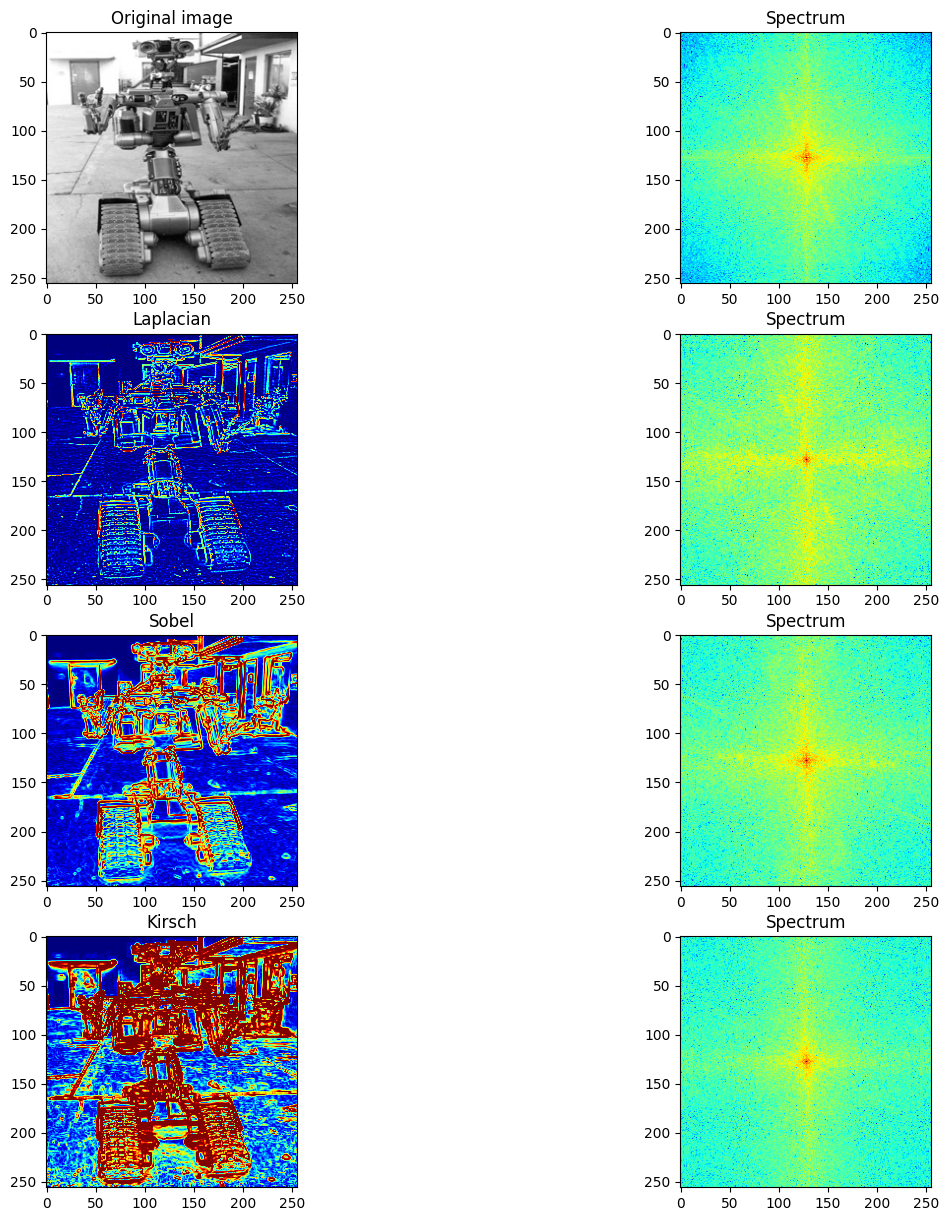

In [47]:
# plot the original and filtered images with their spectrums

fig, axs = plt.subplots(4, 2, figsize=(15, 15))

axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("Original image")
axs[0, 1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))), cmap="jet")
axs[0, 1].set_title("Spectrum")

axs[1, 0].imshow(laplacian, cmap="jet")
axs[1, 0].set_title("Laplacian")
axs[1, 1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(laplacian)))), cmap="jet")
axs[1, 1].set_title("Spectrum")

axs[2, 0].imshow(sobel, cmap="jet")
axs[2, 0].set_title("Sobel")
axs[2, 1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(sobel)))), cmap="jet")
axs[2, 1].set_title("Spectrum")

axs[3, 0].imshow(kirsch, cmap="jet")
axs[3, 0].set_title("Kirsch")
axs[3, 1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(kirsch)))), cmap="jet")
axs[3, 1].set_title("Spectrum")

plt.show()

